# Planar Data Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [2]:
X, Y = load_planar_dataset()

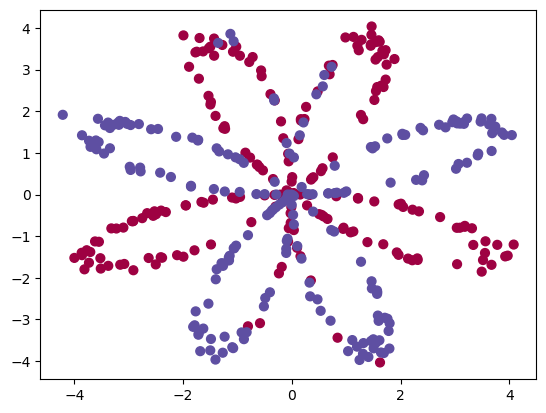

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [4]:
def layer_sizes(X, Y):
  n_x = X.shape[0]    # X = n_features x n_examples
  n_h = 4
  n_y = Y.shape[0]    # Y = truth_values x n_examples

  return (n_x, n_h, n_y)

In [5]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [6]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {
      "W1": W1,
      "b1": b1,
      "W2": W2,
      "b2": b2
    }
    
    return parameters

In [7]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [8]:
def forward_propagation(X, parameters):
  """
  Argument:
  X -- input data of size (n_x, m)
  parameters -- python dictionary containing your parameters (output of initialization function)
  
  Returns:
  A2 -- The sigmoid output of the second activation
  cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
  """

  cache = dict()

  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']


  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)


  return A2, {
    'Z1': Z1,
    'A1': A1,
    'Z2': Z2,
    'A2': A2
  }

In [9]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [10]:
def compute_cost(A2, Y, parameters):
  """
  Computes the cross-entropy cost given in equation (13)
  
  Arguments:
  A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
  Y -- "true" labels vector of shape (1, number of examples)
  parameters -- python dictionary containing your parameters W1, b1, W2 and b2
  [Note that the parameters argument is not used in this function, 
  but the auto-grader currently expects this parameter.
  Future version of this notebook will fix both the notebook 
  and the auto-grader so that `parameters` is not needed.
  For now, please include `parameters` in the function signature,
  and also when invoking this function.]
  
  Returns:
  cost -- cross-entropy cost given equation (13)
  
  """
  
  m = Y.shape[1]

  logprobs_yes = np.multiply(np.log(A2),Y)
  logprobs_no = np.multiply(np.log(1 - A2), 1- Y)
  cost = -1 * np.sum(logprobs_yes + logprobs_no) / m

  cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
  assert(isinstance(cost, float))
    
  return cost


In [11]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [15]:
def backward_propagation(parameters, cache, X, Y):
  """
  Implement the backward propagation using the instructions above.
  
  Arguments:
  parameters -- python dictionary containing our parameters 
  cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
  X -- input data of shape (2, number of examples)
  Y -- "true" labels vector of shape (1, number of examples)
  
  Returns:
  grads -- python dictionary containing your gradients with respect to different parameters
  """
  m = X.shape[1]
  

  W1 = parameters['W1']
  W2 = parameters['W2']

  A1 = cache['A1']
  A2 = cache['A2']

  dj_dZ2 = A2 - Y
  dj_dW2 = (1/m) * np.dot(dj_dZ2, A1.T)
  dj_db2 = (1/m) * np.sum(dj_dZ2, keepdims=True, axis=1)

  g1_Z1 = 1 - np.power(A1, 2)

  dj_dZ1 = np.dot(W2.T, dj_dZ2) * g1_Z1
  dj_dW1 = (1/m) * np.dot(dj_dZ1, X.T)
  dj_db1 = (1/m) * np.sum(dj_dZ1, keepdims=True, axis=1)

  return {
    'dW1': dj_dW1,
    'db1': dj_db1,
    'dW2': dj_dW2,
    'db2': dj_db2
  }



In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [18]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - ( learning_rate * dW1) 
    b1 = b1 - ( learning_rate * db1) 
    W2 = W2 - ( learning_rate * dW2) 
    b2 = b2 - ( learning_rate * db2) 
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [19]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [20]:
# layer_sizes
# initialize_parameters
# forward_propagation
# compute_cost
# backward_propagation
# update_parameters

def nn_model(X, Y, n_h, n_iter=10000, print_cost=False):
  np.random.seed(3)

  sizes = layer_sizes(X, Y)
  n_x = sizes[0]
  n_y = sizes[2]

  parameters = initialize_parameters(n_x, n_h, n_y)

  for i in range(n_iter):
    A2, cache = forward_propagation(X, parameters)
    cost = compute_cost(A2, Y, parameters)
    grads = backward_propagation(parameters, cache, X, Y)

    parameters = update_parameters(parameters, grads)

    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
  
  return parameters



In [22]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, n_iter=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000218
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


In [23]:
def predict(parameters, X):
  A2, cache = forward_propagation(X, parameters)
  return A2 > 0.5

In [24]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219463
Cost after iteration 9000: 0.218560


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

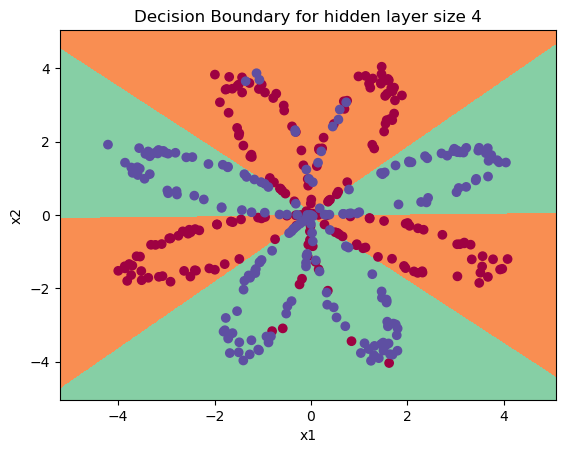

In [26]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, n_iter = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

/tmp/ipykernel_184680/213114593.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


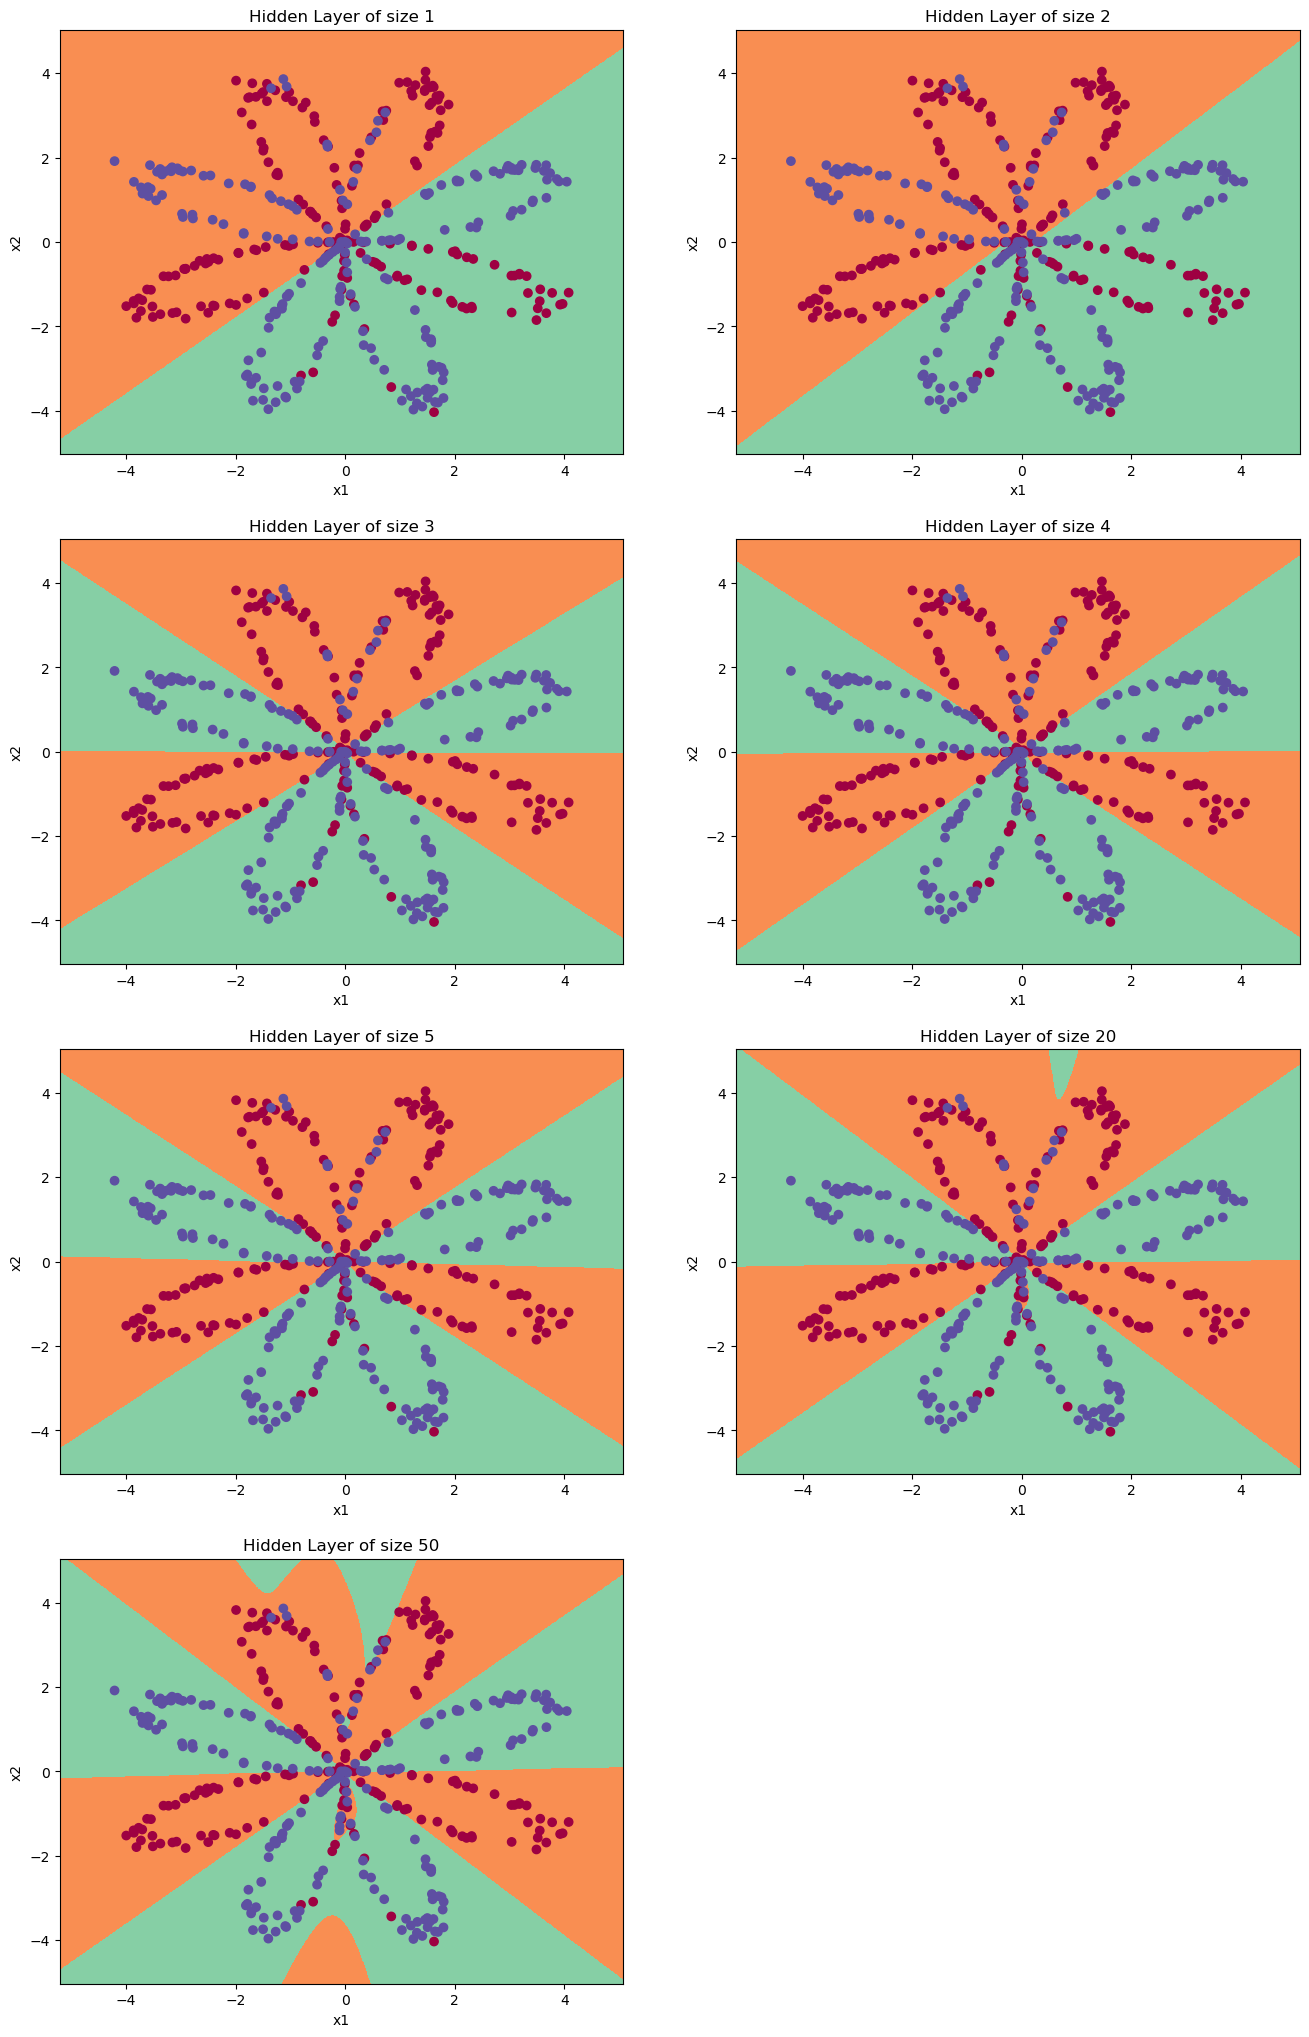

In [28]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, n_iter = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))